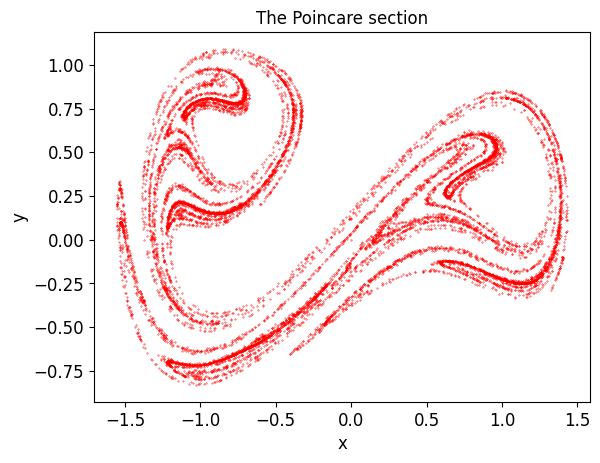

In [ ]:
# Program 09c: Phase portrait and Poincare section of a nonautonomous ODE.
# See Figure 9.11(b).

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import os

xmin, xmax = -2, 2
ymin, ymax = -2, 2


def dx_dt(x, t):
    """
    x[0]: elongacion
    x[1]: velocidad, xdot
    Devuelve la funcion de duffing
    """
    return [x[1], x[0] - delta*x[1] - beta*x[0]**3  + gamma*np.cos(omega*t)]
# x[1] velocidad, x[0] elongacion,

def times(t1, t2, limit = 4000): # tiempo hasta cdo queremos ciclar
    t1 = int(t1 * limit**2 / tmax)
    t2 = int(t2 * limit**2 / tmax)
    return [t1, t2]
#xs resultado de toda la simulacion 12000 ciclos por ej

def plot_fase(xs, t, s, color='r', clean=True, filename='a' ):
    t1 = s[0]
    t2 = s[1]
    xs = xs[t1:t2]

    if clean:
        plt.clf()

    plt.plot(xs[:, 0], xs[:, 1], color+'-', lw=1)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.tick_params(labelsize=12)
    #plt.xlim(xmin, xmax)
    #plt.ylim(ymin, ymax)
    plt.title('Phase portrait')
    plt.savefig('/tmp/f_'+filename+'.png')

def plot_elong(xs, t, s, color='r', clean=True, filename='a'):
    # Elongacion
    t1 = s[0]
    t2 = s[1]
    t = t[t1:t2]
    xs = xs[t1:t2]

    if clean:
        plt.clf()

    plt.plot(t, xs[:, 0], color+'-', lw=1)
    plt.xlabel('t', fontsize=12)
    plt.ylabel('x', fontsize=12)
    plt.tick_params(labelsize=12)
    #plt.xlim(xmin, xmax)
    #plt.ylim(ymin, ymax)
    plt.title('Elongation portrait')
    plt.savefig('/tmp/e_'+filename+'.png')


def plot_poincare(xs, t, s, color='red', clean=True, filename='a', limit=4000):
    x = [xs[limit*i, 0] for i in range(limit)]
    y = [xs[limit*i, 1] for i in range(limit)]

    if clean:
        plt.clf()

    plt.scatter(x, y, color=color, s=0.1)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.tick_params(labelsize=12)
    plt.title('The Poincare section')
    plt.savefig('/tmp/p.png')


def run_simulation(t, x0=0, v0=0, color='r', omega=1, filename='a', clean=True, fase=False, elong=False, poincare=False, tini=0, tfin=100, limit=4000):
    xs = odeint(dx_dt, [x0,v0], t) #resuelve la ecuacion de duffing, cond iniciales y el arreglo del tiempo
    s = times(tini,tfin)
    if fase:
        plot_fase(xs, t, s, color=color, filename=filename, clean=clean)

    if elong:
        plot_elong(xs, t, s, color=color, filename=filename, clean=clean)

    if poincare:
        plot_poincare(xs, t, s, color=color, filename=filename, clean=clean, limit=limit)
    #poincare(xs, t, s, limit)
    return xs

beta = 1
delta = 0.1     # amortiguacion
omega = 1.4     # frecuencia de la fuerza externa
gamma = 0.35     # amplitud de la fuerza externa
x0=0
v0=0

limit = 4000
tmax = limit * (2*np.pi)/omega #para que haga una cantidad entera de ciclo
t = np.linspace(0, tmax, limit**2)

#xs = run_simulation(t, omega=omega, x0=0, v0=0 , filename='a', elong=True, tini=0, tfin=40)
#xs = run_simulation(t, omega=omega, x0=0.01, v0=0.01 , filename='b', color='b', clean=False, elong=True, tini=0, tfin=40)


limit = 12000
tmax = limit * (2*np.pi)/omega
t = np.linspace(0, tmax, limit**2)
xs = run_simulation(t, omega=omega, x0=0, v0=0 , filename='a', poincare=True, tini=0, tfin=tmax, limit=limit)

